In [2]:
import pickle
import sys
from dataclasses import dataclass
from typing import List, Optional, Tuple

import gym
import numpy as np
import phantom as ph

from supply_chain import *

In [18]:
def fn(rollout):
    return {
        "cost_of_carry": rollout.env_config["agent_supertypes"]["SHOP1"].cost_of_carry,
        "mean_stock_held": np.mean(rollout.metrics["stock/SHOP1"]),
    }

results = ph.utils.rllib.rollout(
    directory="PPO/LATEST",
    algorithm="PPO",
    env_class=SupplyChainEnv,
    env_config={
        "agent_supertypes": {
            shop_id: ShopAgent.Supertype(
                cost_of_carry=ph.utils.ranges.UniformRange(
                    start=0.0,
                    end=0.2 + 0.005,
                    step=0.001,
                ),
                # cost_per_unit=ph.utils.ranges.UniformRange(
                #     start=0.2,
                #     end=0.8 + 0.001,
                #     step=0.05,
                # ),
                sale_price=1.0,
                # cost_of_carry=0.05,
                cost_per_unit=0.5,
            )
            for shop_id in SHOP_IDS
        }
    },
    num_repeats=100,
    metrics=metrics,
    record_messages=False,
    result_mapping_fn=fn,
)

Please set this before using Phantom to improve reproducibility.


  0%|          | 0/10100 [00:00<?, ?it/s]2022-09-01 17:13:49,688	INFO worker.py:1518 -- Started a local Ray instance.
2022-09-01 17:13:50,729	INFO worker.py:1518 -- Started a local Ray instance.
2022-09-01 17:13:50,891	INFO worker.py:1518 -- Started a local Ray instance.
2022-09-01 17:13:52,162	INFO algorithm.py:1871 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
2022-09-01 17:13:52,185	INFO algorithm.py:351 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2022-09-01 17:13:52,785	INFO algorithm.py:1871 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution sp

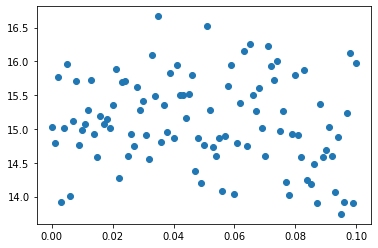

In [19]:
# print([x for x in results[0].actions_for_agent("SHOP1") if x])
# print(results[0].metrics["sales/SHOP1"])
# print(results[0].metrics["stock/SHOP1"])

from collections import defaultdict
import matplotlib.pyplot as plt

S = 100
x = np.arange(S)
y = np.zeros(S)

data = defaultdict(list)

for result in results:
    data[result["cost_of_carry"]].append(result["mean_stock_held"])

x = list(data.keys())
y = list(map(np.mean, data.values()))

plt.scatter(x, y)
plt.show()